# 53组 一个基于集成学习的高级预测模型


组长 张津赫 55190815 完成了80%的工作

组员 葛志杰 55190808 完成了20%的工作

##  　　　　　　　　　　　　　　　　**目录**

### 　　　　　　　　　　　　　　　第一节: 问题描述

### 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　第二节: 问题分析
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　1)探索性资料分析(EDA)

### 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　第三节: 问题建模
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　1)特性工程和数据清理

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　- 增添新特征

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　- 删除冗余特征

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　- 转换特征

### 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　第四节: 模型求解
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　1)利用7种机器学习算法对问题进行预测

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　2)交叉验证


　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　3)超参数调优

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　4)集成学习
### 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　第五节: 结果分析与讨论

# **问题描述**

泰坦尼克号的沉没是历史上最臭名昭著的灾难之一。

1912年4月15日，在她的首航中，“泰坦尼克号”在与冰山相撞后沉没。不幸的是，船上没有足够的救生艇，导致共2224名乘客和船员中的1502人死亡。

研究表明，有些群体比其他群体更有可能生存下来。

### **使用乘客数据，建立一个预测模型，来预测哪些人更有可能生存。**

- 考察数据理解和逻辑思维能力，从数据中提取有用信息；

- 考察数据预处理能力，对数据进行清洗，归一化，编码等 操作；

- 考察数据分析能力，对数据进行有效整合，比如特征筛选和特征提取，从不同角度分析数据，考察数据分析面是否广泛、全面，是否覆盖全部场景。

1．技术使用：Python、scikit-learn、numpy、pandas、matplotlib等；

2．数据分析及预处理：对原始数据进行预处理，比如数据清洗，数据标准化，数据编码等；使用了**EDA方法**

3．模型构建：

　　　1) Logistic Regression 2) Support Vector Machines(Linear and radial) 

　　　3) Random Forest 4) K-Nearest Neighbours 

　　　5) Naive Bayes 6) Decision Tree 

　　　7) Logistic Regression

　　　交叉验证

　　　超参数优化

#### 　　***集成学习***
- Voting Classifier
- Bagging
- Boosting

4．模型评估及优化：对数据进行评估，输出评估结果，就结果进行分析，提出改进建议。

5．数据可视化：对数据进行可视化输出。

# **问题分析**
## 使用探索性资料分析(EDA)方法

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据集总共有12列，其中Survived字段表示的是该乘客是否获救，其余都是乘客的个人信息，包括：

PassengerId => 乘客ID

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名

Sex => 性别

Age => 年龄

SibSp => 堂兄弟/妹个数

Parch => 父母与小孩个数

Ticket => 船票信息

Fare => 票价

Cabin => 客舱

Embarked => 登船港口

In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age、Embarked和Cabin均存在缺失数据，缺失数据需要进行数据清洗处理；缺失值处理常用方法：

- 如果是数值类型，用平均值取代
- 如果是分类数据，用最常见的类别取代
- 使用模型预测缺失值，例如：使用K-NN
对于Age（年龄）和Fare（船票价格）两个数值类型字段机型预测

### 我们来看一下存活与遇难人数比例情况

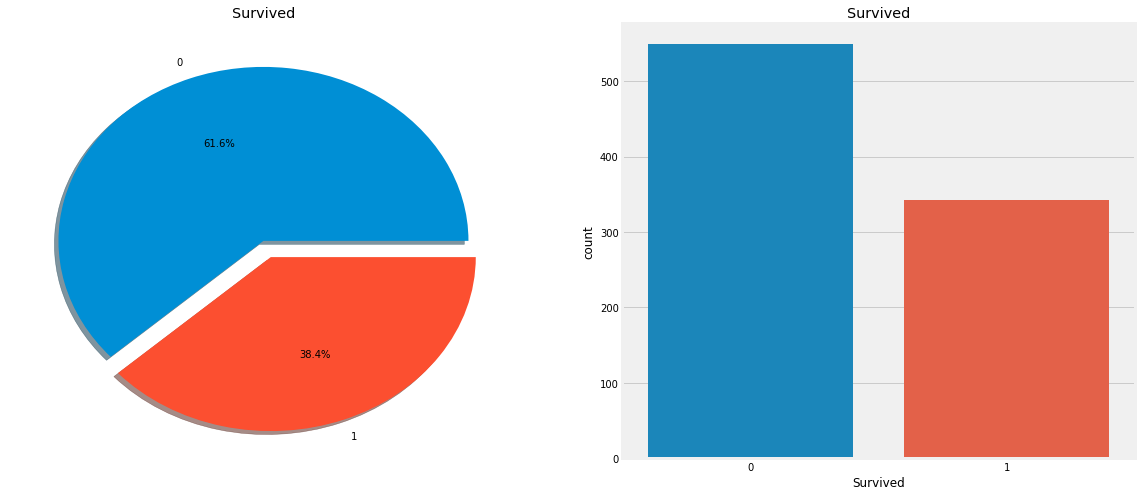

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

可以看出大多数旅客没有幸存
训练集总共891名乘客，只有350人幸存，占比为**38.4%**


### **下面我们来认识理解一下各个特征**


## 特征类型

### 分类特征 Categorical Features:
分类变量是一个具有两个或两个以上类别的变量，该特性中的每个值都可以被它们分类。例如，性别是一个分类变量，有两个类别(男性和女性)。现在我们无法对这些变量进行排序或排序。它们也被称为“名义变量”。**Nominal Variables**.

本数据集中的分类特征：Sex, Embarked

### 序数特征 Ordinal Features:
序数变量类似于分类值，但它们之间的区别是，我们可以对值进行相对排序或排序。

本数据集中的序数特征：Pclass 客舱等级
*1=1等舱，2=2等舱，3=3等舱*

### 连续特征 Continous Feature:
如果一个特征可以取任意两点之间的值，或者特征列中的最小值或最大值之间的值，那么这个特征就是连续的。
本数据集中的连续特征：Age

## 分析特征

## 性别 Sex--> 分类型特征

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

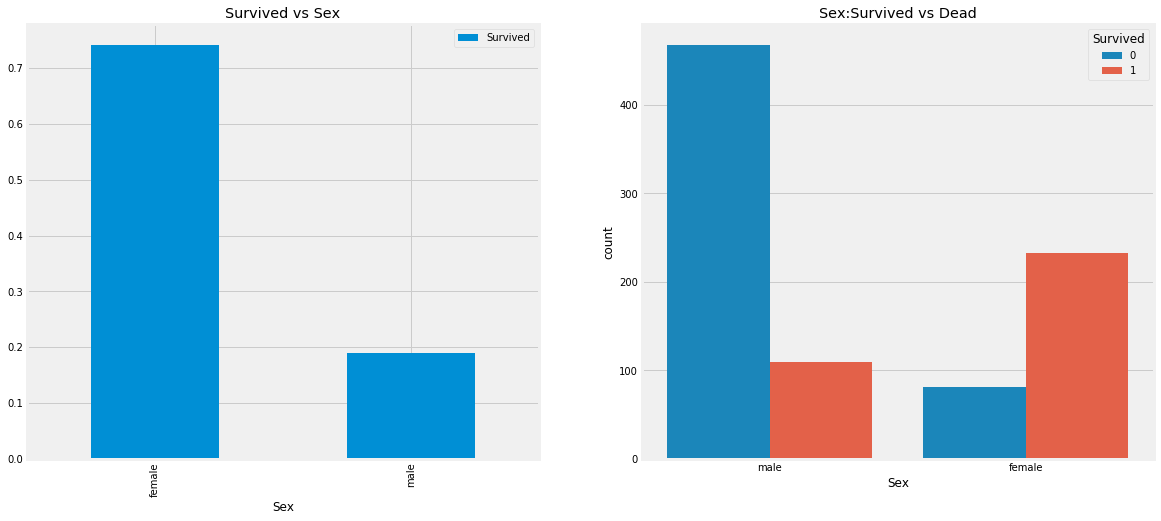

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

船上的男人比女人多很多。然而，女性获救人数几乎是男性获救人数的两倍。

**船上女性的存活率约为75%，而男性的存活率约为18-19%。**

## 客舱等级 Pclass --> 序数特征

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


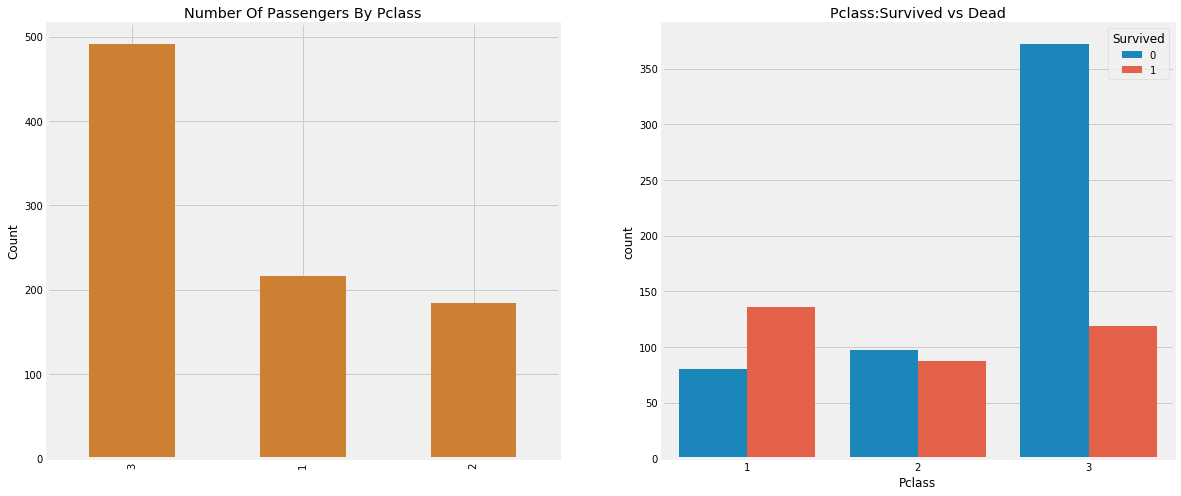

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

我们可以清楚地看到，Pclass 1的乘客在救援时被给予了非常高的优先级。尽管Pclass 3的乘客数量要高得多，但幸存的人数仍然很低，大约在25%左右。

Pclass 1%的存活率约为63%，而Pclass2约为48%。所以金钱和地位很重要。

让我们深入一点，看看其他有趣的观察结果。让我们用**性别和Pclass**一起来检查生存率。

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

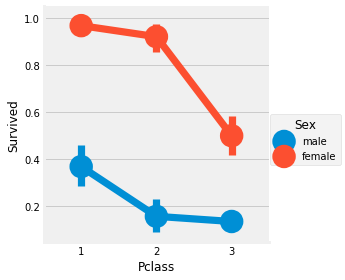

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

在这种情况下，我们使用**FactorPlot**，因为它们使分类值的分离变得容易。

通过**交叉表**和**因子图**，我们可以很容易地推断出来自Pclass1的**女性的存活率大约是95-96%**，因为来自Pclass1的94名女性中只有3人死亡。

很明显，不管等级高低，女性在救援时被优先考虑。即使是来自class1的男性也有非常低的存活率。

## Age--> 连续型特征

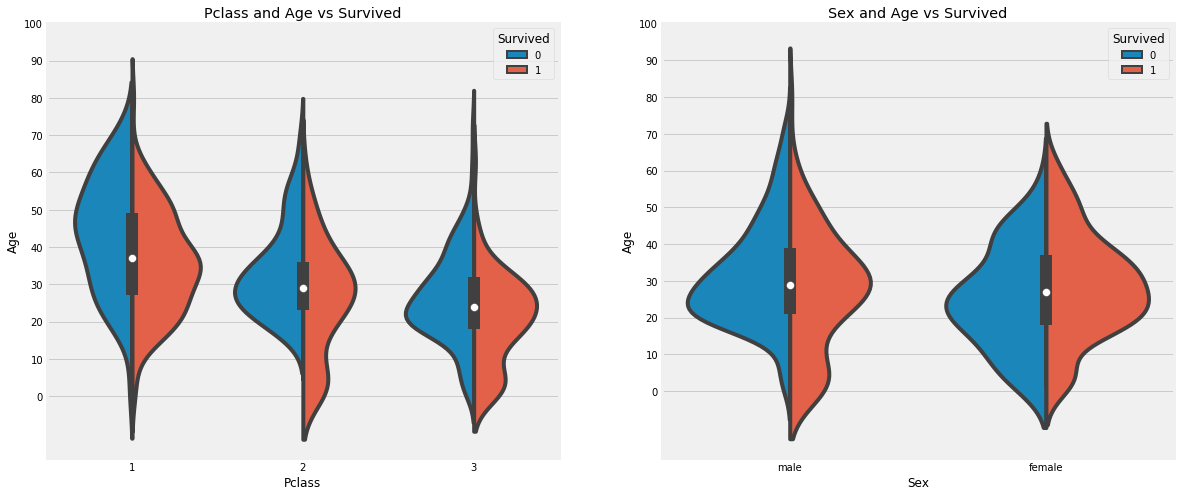

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 结论:

1)儿童的数量随着Pclass的增加而增加，10岁以下乘客的存活率都很好，不管他们属于哪个阶级。

2)一班乘客年龄在20-50岁之间，生还几率很高，女性乘客的生还几率更高。

3)对于男性来说，存活的机会随着年龄的增长而减少。

正如前面所说的，Age特性有**177**个空值。要替换这些NaN值，我们可以给它们分配数据集的平均年龄。

**特别的**, 我们可以查看**Name**特性。从特征上看，我们可以看到每个名字有一个称呼，如先生或夫人，因此我们可以将先生和夫人的年龄平均值分配给各自的组。

In [13]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') 

In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


有些拼错的首字母，比如mle或Mme，代表Miss。我会用Miss替换它们。

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### 填充缺失值

In [17]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

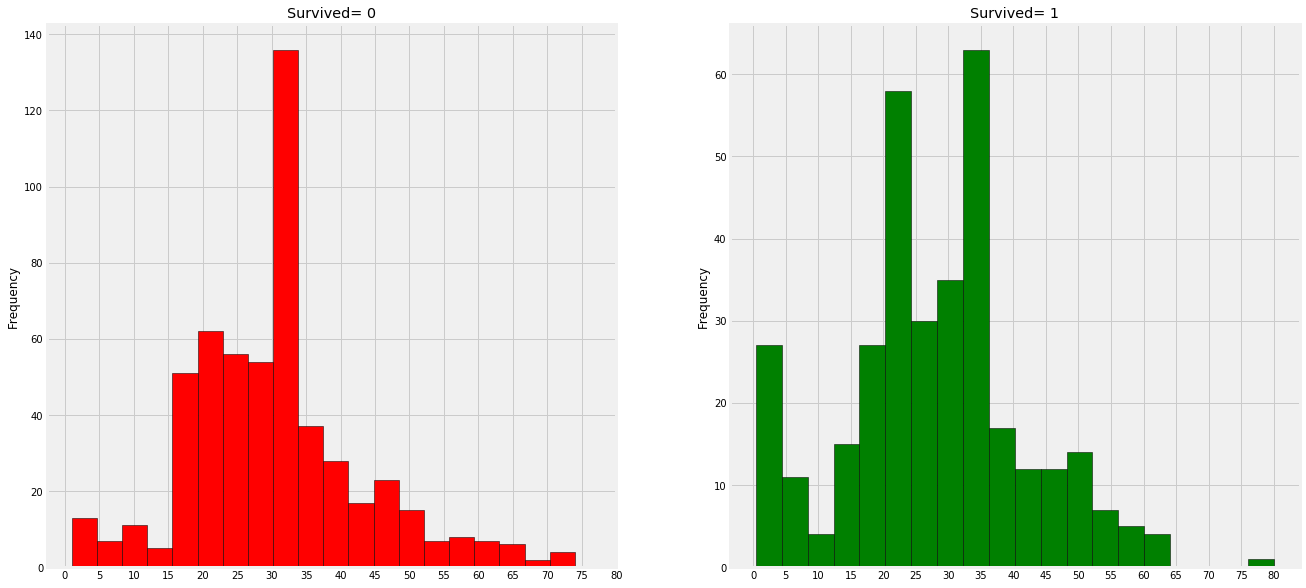

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 结论:
1)幼儿(5岁以下)被大量拯救 (妇女和儿童优先政策)。

2)年龄最长的乘客得救了(80岁)。

3)死亡人数最多的年龄组为30-40岁。

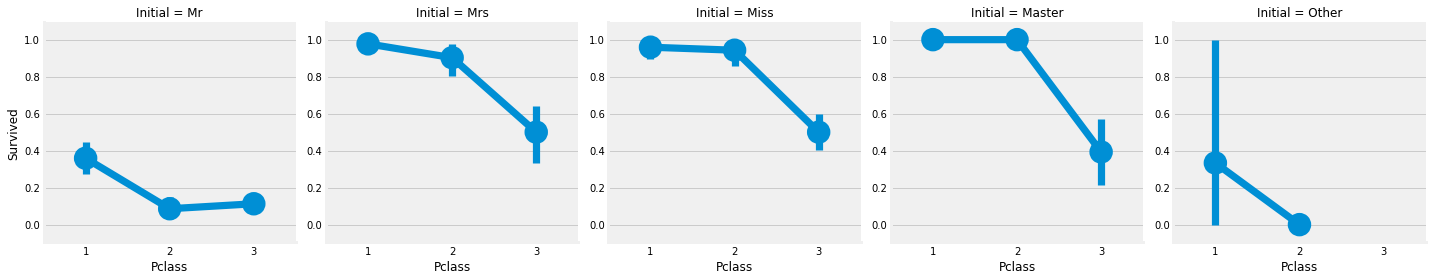

In [19]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

妇女和儿童优先的政策适用于各个阶级。

## Embarked--> 分类型特征

In [20]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 不同的登船港有不同的生存机会

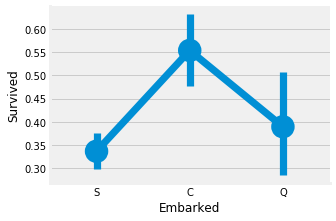

In [21]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C港的存活率最高，约为0.55，而S港的存活率最低。

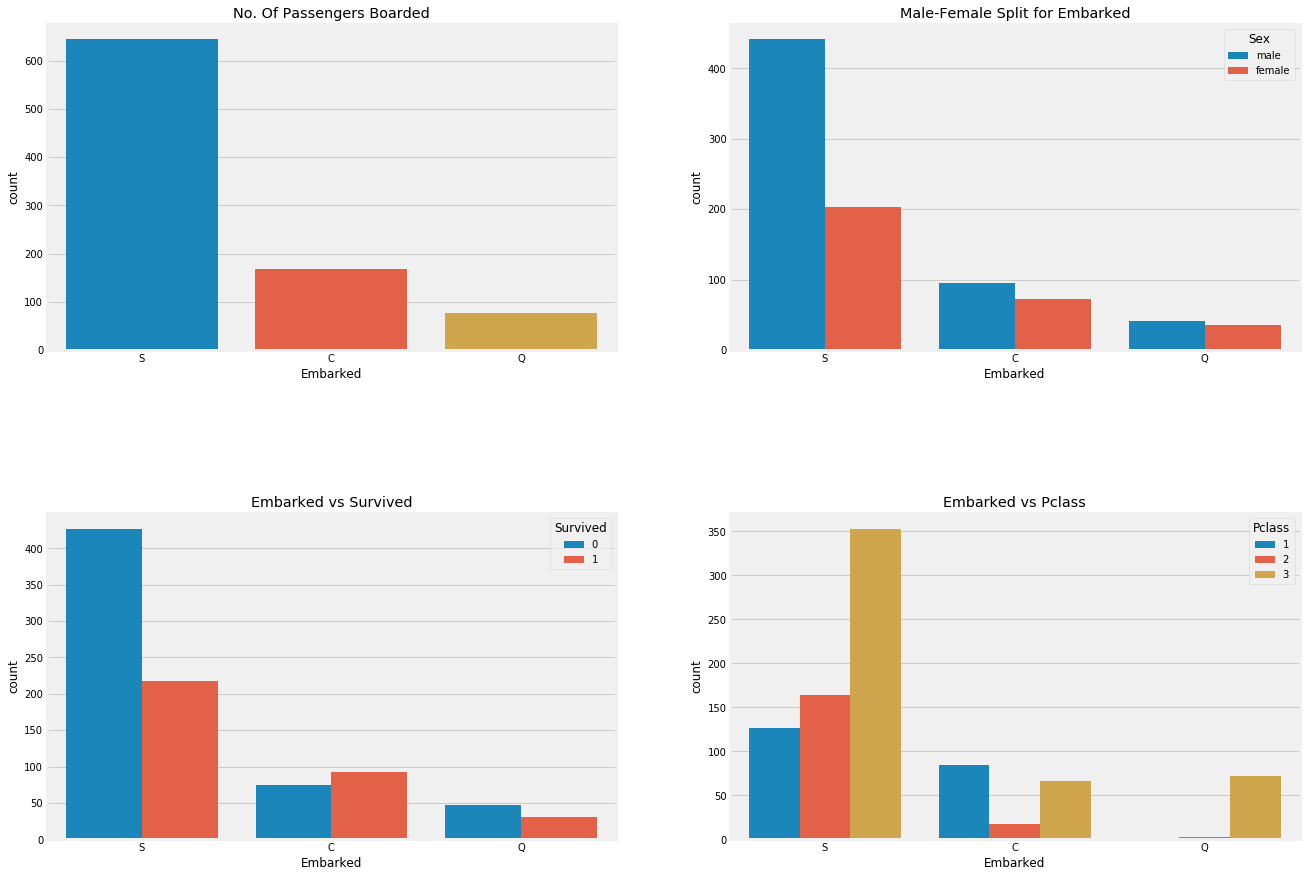

In [22]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

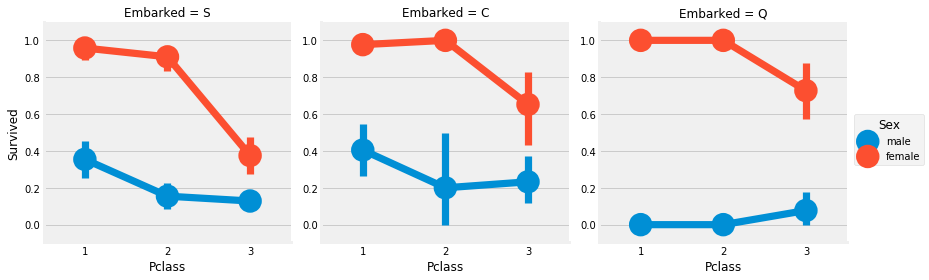

In [23]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### 替换Embarked的NaN值

我们看到从S港上船的乘客最多，我们用S代替NaN。

In [24]:
data['Embarked'].fillna('S',inplace=True)

## SibSip-->离散型特征
这个特征表示某人是独自一人还是与家人在一起。（堂兄弟/妹有几人）

In [25]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


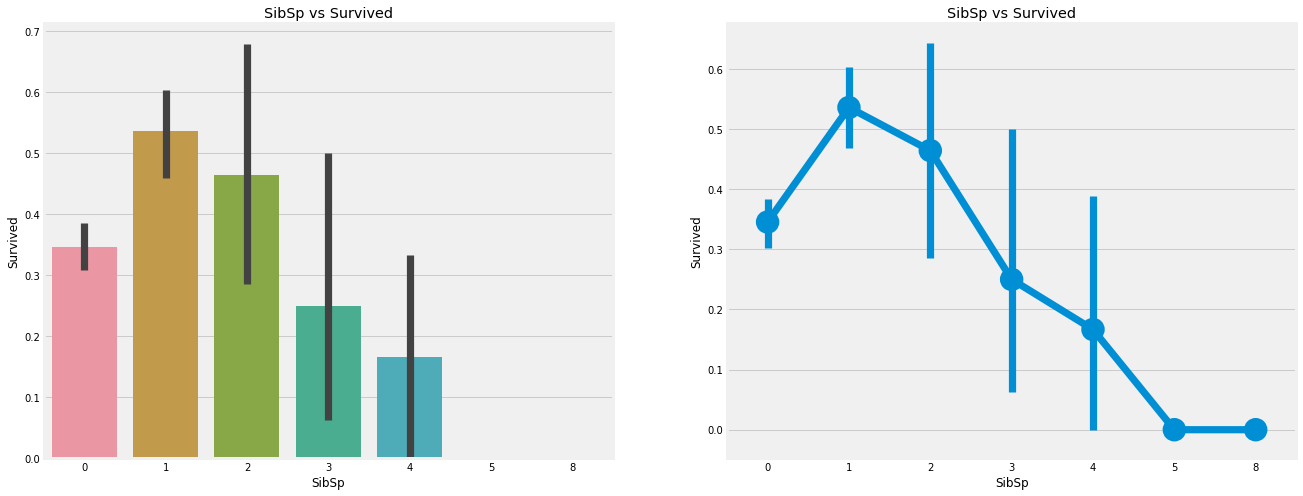

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [27]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 结论:

从barplot和factorplot可以看出，如果一名乘客独自在飞机上没有兄弟姐妹，他的存活率为34.5%。如果兄弟姐妹的数量增加，存活率会减少。也就是说，如果有家人在船上，会尽量救他们，而不是先救我自己。

## Fare--> 连续型特征

此行最高的花费为512，最低的花费为0元，平均费用为32.204元

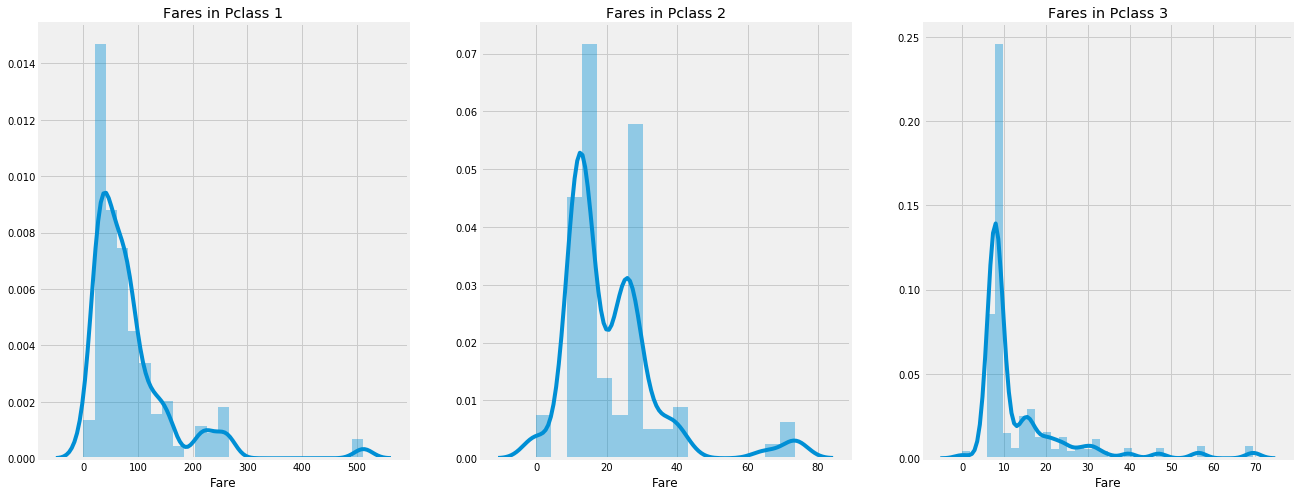

In [28]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## 对所有特征的总结
**性别:** 女性的生存机会比男性高。

**舱等级: 有一个明显的趋势是，头等舱乘客的生存几率会更高。 3等舱的存活率很低.**

**年龄:** 5-10岁的儿童有很高的生存机会。15岁至35岁的乘客死亡人数很多。

**登船港口:** 尽管大多数头等舱的乘客是在S港登船，但在C港登船的旅客生存率确比S港高，在Q港登船的旅客都是3等舱的

**SibSp:** 有1-2个兄弟姐妹、配偶或1-3个父母在船上，比独自一人或跟随一个大家庭一起旅行生存的可能性大。

## 特征之间的相关性

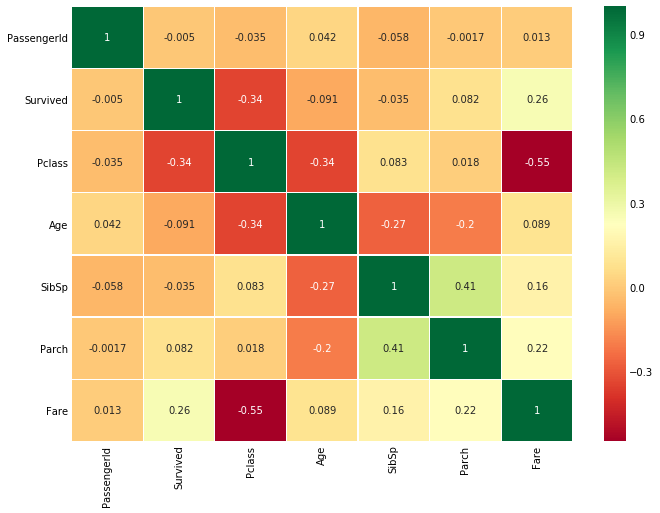

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 解释热图

首先要注意的是，只比较数字特性，因为很明显，我们无法在字母或字符串之间建立关联。 

**正相关:** 如果特征A的增加导致特征B的增加，那么它们是正相关的。值**1**表示完全正相关。

**负相关:** 如果特征A的增加导致特征B的减少，那么它们是负相关的。值**-1**表示完全负相关。

假设两个特征高度相关或完全相关，其中一个的增加会导致另一个的增加。这意味着两个特征都包含高度相似的信息，这被称为**多共线性**，它们都包含几乎相同的信息。
我们应该尽量消除冗余特征，因为它可以减少训练时间和许多这样的优点。

从上面的热图，我们可以看到这些特征没有太多的相关性。

# **问题建模**
## 特性工程和数据清理

### 将年龄分箱

#### 对年龄特征***离散化***:
年龄是一个连续的特征，要按他们的年龄来分组，就必须对数据进行分箱处理（离散化）

年龄值的范围是0-80，我们将年龄分成5部分

In [30]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [31]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


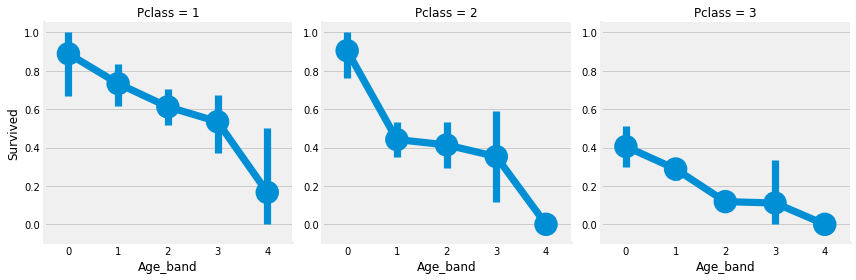

In [32]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

不论乘客的等级是什么，随着年龄的增长，存活率都在下降。

## 创建必要的新特征
我们创建一个名为“Family_size”和“Alone”的新功能，并对其进行分析。这个特性是Parch（父母与小孩个数）和SibSp（ 堂兄弟/妹个数）的总和。这样我们就可以检查存活率是否与乘客的家庭规模有关。Alone表示乘客是否单独出行。

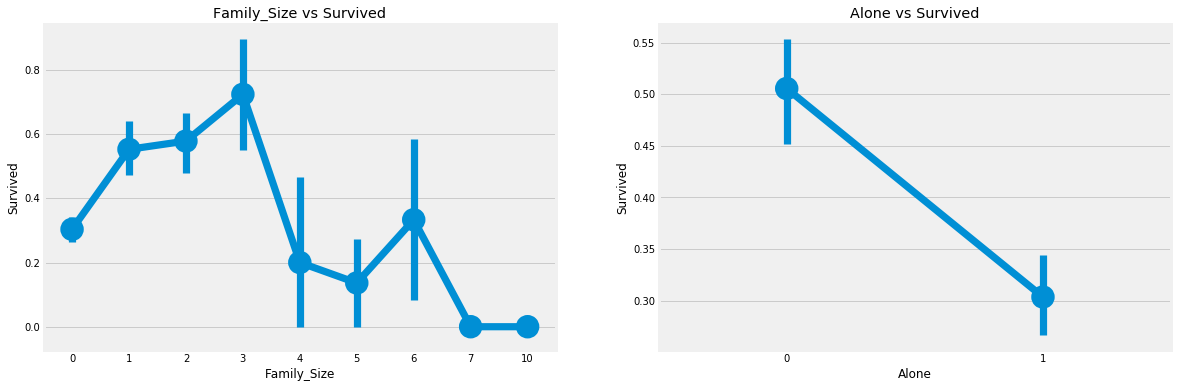

In [33]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0 意味着乘客是独自一人.** 显然，如果是一个人或家庭规模=0，那么生存的机会很低。对于家庭规模>4的人来说，生存可能性也会降低。这是模型的一个重要特性，让我们进一步研究一下。

## 将fare离散化

In [34]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


我们可以清楚地看到，随着**票价的增加**，**生存几率**也会增加

In [35]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

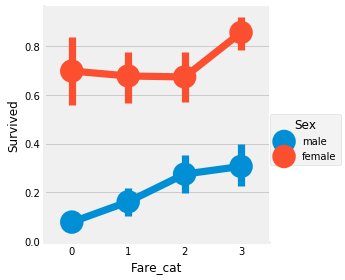

In [36]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

可以发现，不论男女，票价越高，生存几率越大

## 将字符串值转换为数值

由于我们不能将字符串传递给机器学习模型，我们需要将诸如Sex、登船地点等特性转换为数值。

In [37]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### 删除不需要的特征

**姓名**--> 我们不需要姓名特性，没什么价值

**年龄**--> 我们已对年龄进行分箱，得到了Age_band特征

**票**--> 没用

**费用**--> 我们已对票价进行分箱，得到了Fare_cat特征

**客舱**--> 有许多NaN值，无用的特性。

**Fare_Range**--> 我们已有fare_cat功能。

**PassengerId**--> 无法被归类。

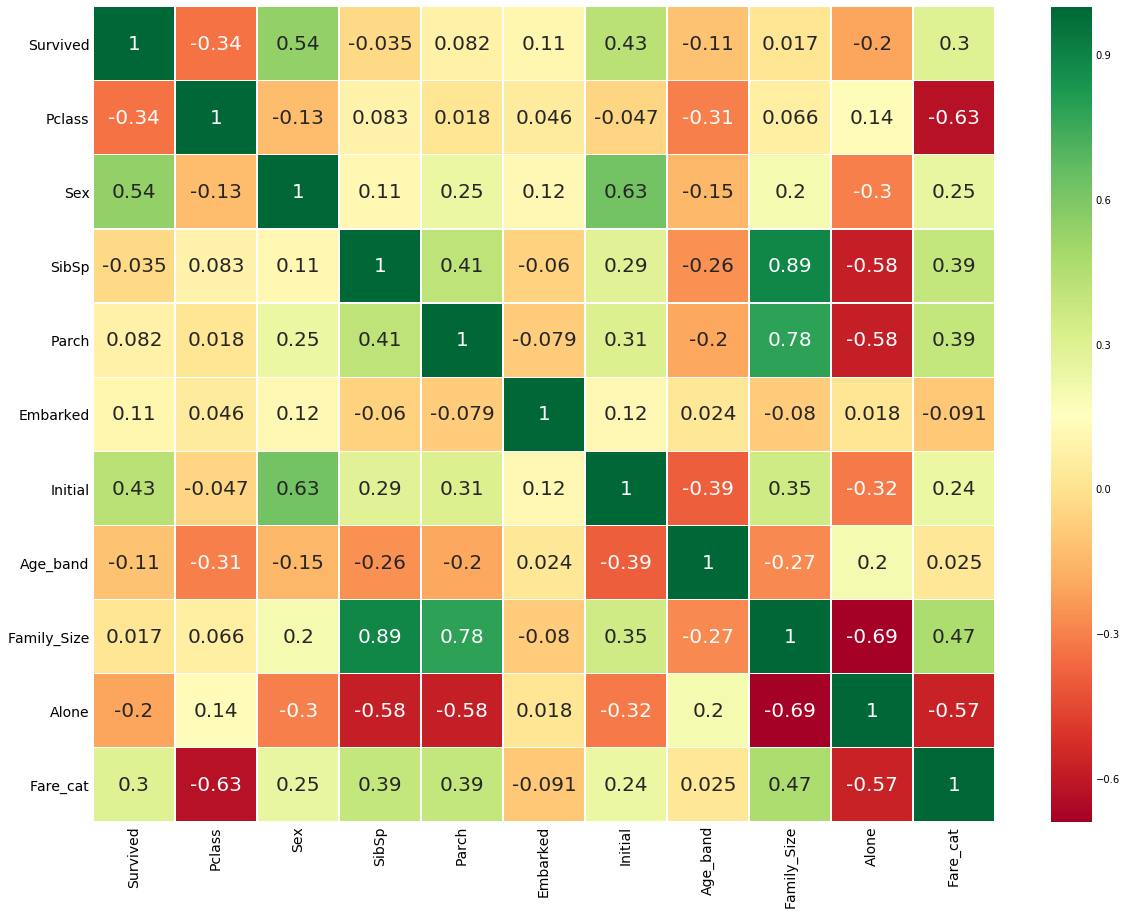

In [38]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# **模型求解**

分别使用以下机器学习算法建立模型，之后我将会进行改进:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [39]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [40]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [41]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522


### Linear Support Vector Machine(linear-SVM)

In [42]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.817164179104


### Logistic Regression

In [43]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.817164179104


### Decision Tree

In [44]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.809701492537


### K-Nearest Neighbours(KNN)

In [45]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552239


当我们改变n_neighbors属性的值时，KNN模型的准确性也随之改变。缺省值为5。让我们检查各种n_neighbors值的准确性。

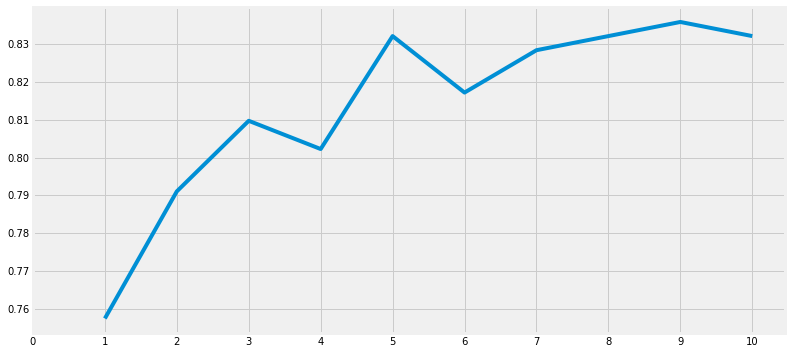

Accuracies for different values of n are: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955] with the max value as  0.835820895522


In [46]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [47]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.813432835821


### Random Forests

In [48]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.813432835821


![aa](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/fittings.jpg)

![aa](https://pic2.zhimg.com/80/v2-ba86376ec8d7c14c0d19c5785a7b2c39_720w.jpg)![54](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

## 方差、偏差均衡
#### 注意bias(偏差)与variance(方差)的区别

**偏差：**描述的是预测值（估计值）的期望与真实值之间的差距。偏差越大，越偏离真实数据，如上图所示。

**方差：**描述的是预测值的变化范围(与真实值无关)，离散程度，也就是离其期望值的距离。方差越大，数据的分布越分散，如上图所示。

#### 欠拟合与过拟合
- 欠拟合是指模型未能捕捉到数据的重要方面，模型学习能力不足，因而导致泛化能力弱，导致训练误差大
- 过拟合常常在模型学习能力过强的情况中出现，此时模型学习能力太强，以至于将训练集单个样本自身的特点都能捕捉到，并将其认为是"一般规律"，这种情况也会导致模型泛化能力下降，过拟合往往能较好地学习训练集数据的性质，而在**测试集**上的**性能较差**

#### 解决思路
避免欠拟合，减小偏差：
- 寻找更好的特征 -- 具有代表性。
- 用更多的特征 -- 增大输入向量的维度。（增加模型复杂度）

避免过拟合，减小方差：
- 增大数据集合 -- 使用更多的数据，减少数据扰动所造成的影响
- 减少数据特征 -- 减少数据维度，减少模型复杂度
- 正则化方法
- 交叉验证法

## 为了得到可靠稳定的模型，我使用了**交叉验证**。

# 交叉验证

很多时候，数据是不平衡的，也就是说，可能某个实例的数量很多，而其他类实例的数量较少。因此，我们应该在数据集的每个实例上训练和测试我们的算法。取准确性的平均值。

1)K-折交叉验证的工作原理是将数据集划分为k个子集。

2)假设我们将数据集分成(k=5)个部分。我们预留1部分用于测试，并在4部分上训练算法。

3)我们通过在每次迭代中改变测试部分并在其他部分上训练算法来继续这个过程。然后对精度和误差取平均值，得到算法的平均精度。

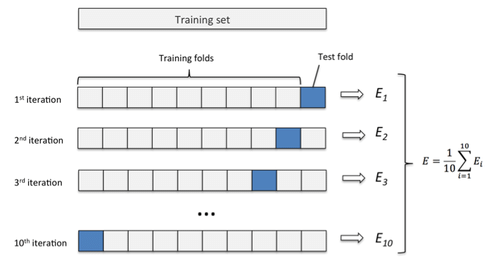

In [49]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=22) 
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.812584,0.025527
Naive Bayes,0.801386,0.028999
Random Forest,0.815968,0.032824


### 可以发现，经过交叉验证，在最大准确度上比不使用时有所下降，但方差明显减小，证明我的模型更加可靠，稳定。

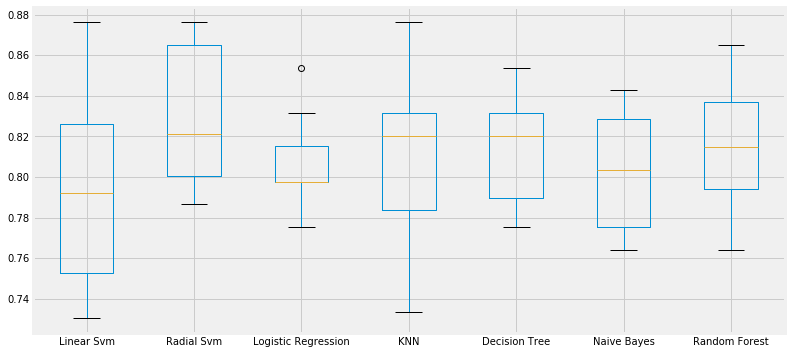

In [50]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

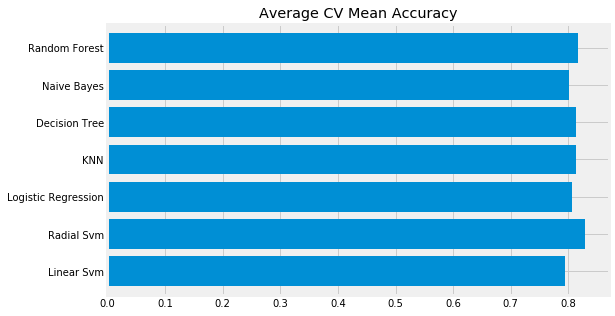

In [51]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## 混淆矩阵

它给出了分类器正确分类和错误分类的数量

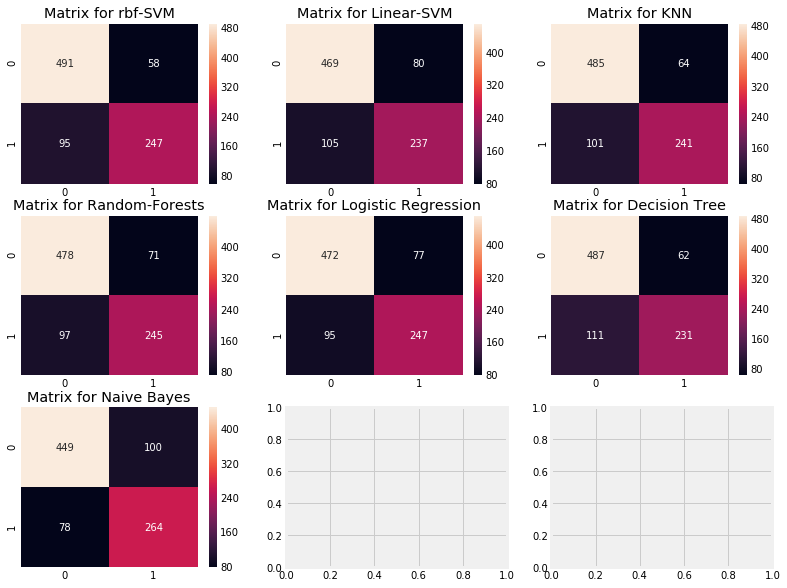

In [52]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

x轴代表预测值，y轴代表真实值

## **超参数优化**

超参数是在模型拟合之前设置的模型参数，决定模型的表现，通常情况下，需要对超参数进行优化，给学习机选择一组最优超参数，以提高学习的性能和效果。


超参数的一些示例：
- 聚类中类的个数
- 模型的学习率
- 深层神经网络隐藏层层数
- 树的数量或树的深度
- 矩阵分解中潜在因素的数量
- k均值聚类中的簇数

#### 主流的**超参数调优**方法有以下几种
- 手动调参
- 网格搜索
- 随机搜索
- 贝叶斯搜索

本实验中我使用**网格搜索**的方法对SVM和RandomForests两个分类器的超参数进行调优

#### SVM调优

In [53]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   15.2s finished


#### Random Forests调优

In [54]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   19.6s finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。

gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度。

通过结果可以发现本实验中对SVM来说**C**参数取**0.05**，**gamma**值取**0.1**时效果最好

n_estimators：表示森林里树的个数,n_estimators越大越好，但占用的内存与训练和预测的时间也会相应增长，且边际效益是递减的

对随机森林来说，**n_estimators**设定为**900**时效果最好

## 我们发现，其实上述的几种方法在准确度上没有明显的差异，为了继续提高模型预测的准确率，我引入***集成学习***的方法：

![](https://img-blog.csdnimg.cn/2019081709593198.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2FiY2RyYWNoZWw=,size_16,color_FFFFFF,t_70)

# **集成学习**

集成是提高模型准确性或性能的好方法。它可以减少了模型的结果的方差，使其更**可靠**。

简单地说，它是用各种简单模型的组合来创建一个强大的单一模型。

集成有以下方式:

1)Voting Classifier

2)Bagging

3)Boosting

## Voting Classifier

在此我们使用**软投票**的方法

软投票就是计算得出不同方法的分类概率的均值，最后选择均值最高的作为预测结果。

In [55]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.824626865672
The cross validated score is 0.824902394734


## Bagging

套袋法是一种通用的集成方法。它的工作原理是在数据集的小分区上应用类似的分类器，然后取所有预测的平均值。 

![ss](https://pic1.zhimg.com/9edf53941bf363de1fb186433cce6e28_r.jpg?source=1940ef5c)

#### Bagged KNN

Bagging在具有大方差的模型中效果最好。例子是决策树或随机森林。

In [56]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522
The cross validated score for bagged KNN is: 0.814889342867


### 在此与上一种集成方法相比较，准确率有所提高，提高了一个百分点


#### Bagged DecisionTree


In [57]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.824626865672
The cross validated score for bagged Decision Tree is: 0.820482635342


## Boosting

Boosting是一种利用分类器学习顺序的技术，它可以一步步提高弱分类器的能力

首先在完整的数据集上训练模型，模型将得到一些正确的实例，和一些错误的结果。那么在下次迭代中, 模型将会更多地关注错误的预测结果或给予它更多的权重。试图将错误的预测结果变为正确的。继续迭代, 在模型中加入新的分类器，直到达到精度限制。

总的来说：

- 步骤1：所有分布下的基础学习器对于每个观测值都应该有相同的权重

- 步骤2：如果第一个基础的学习算法预测错误，则该点在下一次的基础学习算法中有更高的权重

- 步骤3：迭代第2步，直到到达预定的学习器数量或预定的预测精度。

最后，将输出的多个弱学习器组合成一个强的学习器，提高模型的整体预测精度。Boosting总是更加关注被错误分类的弱规则。

## AdaBoost(Adaptive Boosting)  自适应增强

#### 有了两个问题需要去解决：
- 在每一轮如何改变训练数据的权值或概率分布？
- 如何将弱分类器组合成一个强分类器？

通过例子来解释过程

- Box 1: 可以看到我们假设所有的数据点有相同的权重（正号、负号的大小都一样），并用一个决策树桩D1将它们分为两部分。我们可以看到这个决策树桩将其中的三个正号标记的数据点分类错误，因此我们将这三个点赋予更大的权重交由下一个预测树桩进行分类。
- Box 2: 在这里可以看到三个未被正确分类的（+）号的点的权重变大。在这种情况下，第二个决策树桩D2试图将这三个错误的点准确的分类，但是这又引起新的分类错误，将三个（-）号标记的点识别错误，因此在下一次分类中，这三个（-）号标记的点被赋予更大的权重。
- Box 3: 在这里三个被错误分类的（-）号标记的点被赋予更大的权重，利用决策树桩D3进行新的分类，这时候又产生了新的分类错误，图中用小圆圈圈起来的一个负号点和两个正号点
- Box 4: 在这里，我们将D1、D2和D3三个决策器组合起来形成一个复杂的规则，可以看到这个组合后的决策器比它们任何一个弱分类器表现的都足够好。

迭代，直到分类器数量达到预定值或预测精度达到预定值




![xxx](https://www.biaodianfu.com/wp-content/uploads/2020/09/adaboost.png)

本实验中弱分类器选取的是决策树

例如，我们用10个数据集开始一个决策树桩。第一个决策树桩将为所有数据点均匀地分配一个权重。这意味着每个数据点的权重是1/10。假设权重分布后我们运行模型，发现两个错误的预测。为了计算总误差，我们将所有错误分类的权重加起来。这里我们得到1/10 + 1/10 = 2/10 = 1/5。这是我们的总误差。

$$\epsilon_t = \frac{\text{misclassifications}_t}{\text{observations}_t}$$

我们用总误差来确定一个决策树桩的话语权，使用下面的公式

$$\alpha_t = \frac{1}{2}ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right) \text{where } \epsilon_t < 1$$

- $\alpha_t$= 话语权

　　　　　　　　　　　　　　　　　![a](http://chrisjmccormick.files.wordpress.com/2013/12/adaboost_alphacurve.png)
                 
                 
- 总错误(错误率)在0到1之间

- 当决策树桩做得相当好，总误差最小时，则话语权(Alpha)的数量相对较大，Alpha值为正。

- 当树桩效果一般时，那么总误差约~0.5。在这种情况下，话语权是0。

- 当错误率很高时，比如接近1，那么他的话语权将是负的。

$$New Sample Weight = Sample Weight + e^{\alpha_t}$$

$\alpha_t$可以为正或负,我们想要增加误分类样本的权重,暗示下一个决策树桩要更加强调这些。反过来，我们要降低正确分类样本的权重,暗示下一个树桩不要太强调这些。

下面的公式可以帮助我们做这个计算。

$$D_{t+1}(i) = D_t(i) e^{-\alpha_t y_i h_t(x_i)}$$

* $D_{t+1}(i)$ = 新的样本权重
* $D_t(i)$ = 当前样本权重
* $\alpha_t$ = 话语权, alpha值, 在每次迭代中更新的系数
* $y_i h_t(x_i)$ = 正确分类为1，错误分类为-1

最后

$$AdaBoost(X) = sign\left(\sum_{t=1}^T\alpha_t h_t(X)\right)$$


$T$ 是一系列弱分类器

$h_t(X)$是弱分类器对$t$的预测结果

随着决策树桩链的延续，在过程的最后，AdaBoost成为一个强大的树，减少了偏差和方差。

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.824952616048


### 优点

- 适当超参数调优时，可以获得比bagging更高的性能
- 对分类和回归有同样的效果
- 可轻松处理多种类型数据
- 可以使用“鲁棒”损失函数，使模型抵抗异常值

---

### 缺点

- 调优超参数是困难和耗时的。
- 不能像bagging那样并行化(当数据量很大时，可伸缩性很差)。
- 与bagging相比，过度拟合的风险更高。

#### Stochastic Gradient Boosting

它主要的思想是，每一次建立模型是在之前建立模型损失函数的梯度下降方向

如果我们的模型能够让损失函数持续的下降，则说明我们的模型在不停的改进，而最好的方式就是让损失函数在其梯度（Gradient)的方向上下降。

- Gradient Boosting通过残差来变量的改变错误分类的权重,而AdaBoost就真的直接去修改分类错误的训练权重了

- Gradient Boosting接入的分类器一般完整的决策树居多，但是AdaBoost一般使用二层决策树

弱分类器选取的是决策树

可以调整参数以优化算法的性能：

- n_estimators：它控制了弱学习器的数量
- learning_rate：控制在最后的组合中每个弱分类器的权重，需要在learning_rate和n_estimators间有个权衡
- base_estimators：它用来指定不同的ML算法。

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.818286233118


#### XGBoost

XGBoost 是 “Extreme Gradient Boosting”的简称，是GBDT的一种高效实现

In [60]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.810471002156


# **结果分析与讨论**

AdaBoost得到了最高的准确率

下面我尝试用超参数调优来增加它的准确度

#### 对AdaBoost进行超参数调优

In [61]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.0min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


利用adaboost集成我们达到了 **83.16%的准确率 (n_estimators=200 and learning_rate=0.05)**

### 最好模型的混淆矩阵

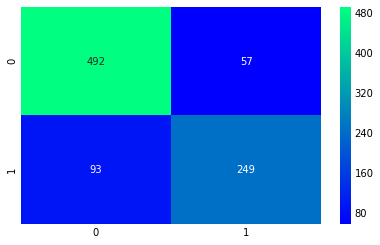

In [62]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## 特征重要度

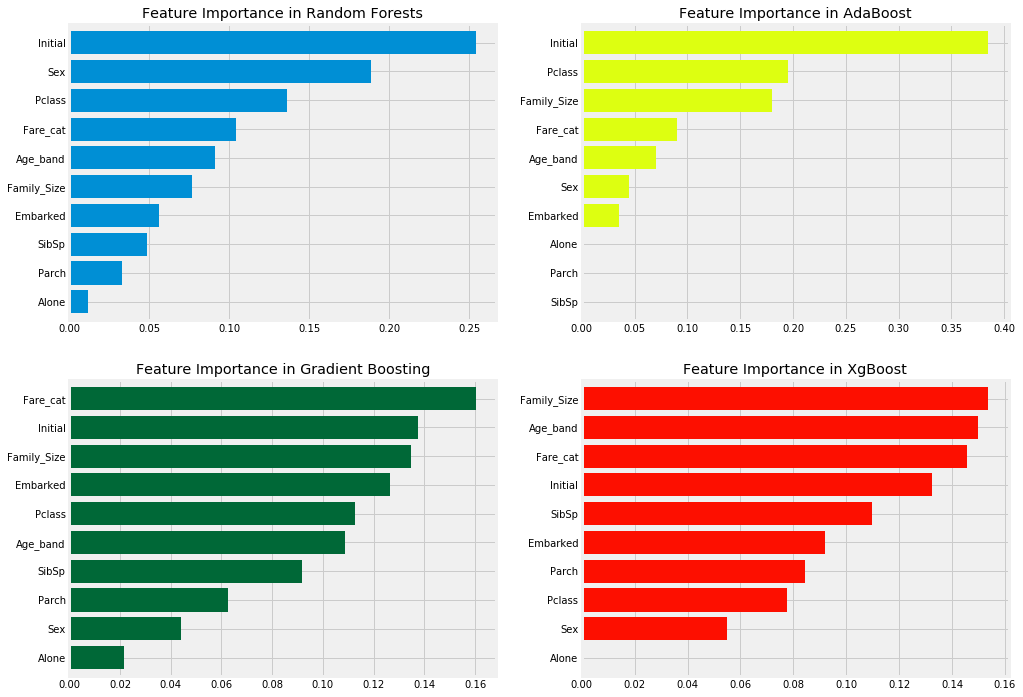

In [63]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

## **结论**:




- 船上男性乘客人数大约为女性乘客的2倍，然而男性乘客的存活率仅约为20%，女性乘客的存活率达到70%以上，很可能泰坦尼克号当时采取女性优先逃离的原则。

- 大部分乘客是从泰坦尼克号起始地点英国南安普敦港口出发的，而这部分乘客的存活率却最低，可能与其基数大、乘客身份复杂有关。在法国瑟堡市港口登船的乘客相对存活率最高，达到50%以上。

- 船票价格越高，乘客所在的客舱等级也越高，乘客存活率也越高。购买三等舱船票的乘客最多，存活率最低，这是由于客舱等级越低，所居住的位置就越靠近船舱的底部，灾难发生时逃生所需的时间越久，导致存活率越低。

- 乘客中已婚男士数量最多，其次是未婚女士和已婚女士。然而已婚男士的存活率最低，已婚女士和未婚女士的存活率分别居第一和第二，进一步证明了泰坦尼克号当时采取女性优先逃离的原则。

- 独自出行的乘客人数最多，其次是中等规模家庭（2~4人）的乘客人数，5人以上的大规模家庭较少。从存活率上看，由于大规模家庭在三等舱乘客占比最高，中等规模家庭在一等舱乘客占比最高，因此大规模家庭的乘客存活率低

- 中等规模家庭的乘客存活率最高。

## **待提高改进的地方**:

- 本次实验使用了集成学习中的3种方法，其实还有其他的方法比如stacking，在未来可以继续探索，寻找出好的堆叠结构
- 可不可以创造出更多的特征，增加弱分类器的准确度